In [4]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import numpy as np

<h1> Quantum Entanglement </h1>

c:\Users\jugal\.conda\envs\QCQML\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


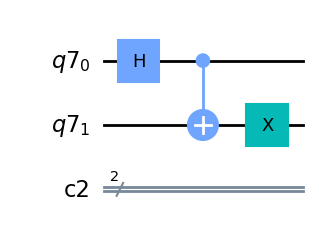

In [8]:
sim1 = Aer.backends("statevector_simulator")[0]
mSim = Aer.backends("qasm_simulator")[0]
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.cx(0,1)
qc.x(1)
qc.draw("mpl")


In [9]:
job = execute(qc,sim1)
results = job.result()
print(results.get_statevector())

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [10]:
qc.measure(0,0)

job = execute(qc,mSim)
results = job.result()
print(results.get_counts())


{'00': 529, '01': 495}


<h1> Quantum Teleportation </h1>

<h2>Basic idea of quantum teleportation is , creating scenario where Alice wants to teleport her Qubits to Bob using classical channels  </h2>

<h2> Step 1 </h2>

<ul>
    <li> Specify backend simulator for experiment </li>
    <li> Define quantum registers </li>
    <li> Define classical registers </li>
    <li> Define quantum circuit </li>
</ul>

In [2]:
sim = Aer.get_backend("statevector_simulator")
qr = QuantumRegister(3)
crx = ClassicalRegister(2)
crz = ClassicalRegister(1)

qc = QuantumCircuit(qr,crz,crx)

<h2> Step 2 </h2>

<ul>
   <li> Apply Hadamard gate to first qubit 0 for generating |0> + |1> state which needs to be teleported to bob </li>
   <li> Then generate entangled states using qubit 1 and qubit2 which will be shared by alice and bob  </li>
</ul>

c:\Users\jugal\.conda\envs\QCQML\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


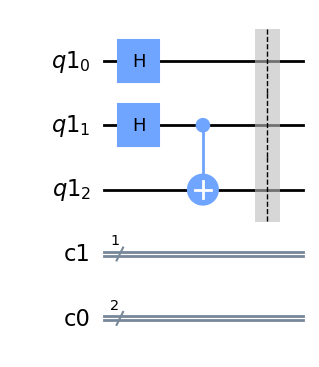

In [3]:
qc.h(0)
qc.h(1)
qc.cx(1,2)

#qc.h(0)
qc.barrier()
qc.draw("mpl")

<h2> Step 3 </h2>

<ul>
    <li> Apply controlled not gate on qubit 0 and qubit 1 where qubit 0 will act as controlled qubit and qubit 1 will act as target qubit </li>
    <li> draw the circuit for visualization purpose </li>
</ul>

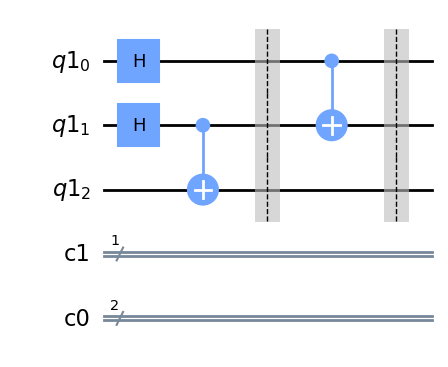

In [4]:
qc.cx(0,1)
qc.barrier()
qc.draw("mpl")


<h2> Step 4 </h2>

<ul>
    <li> Apply hadamard gate to the output of qubit 0 in circuit </li>
    <li> Add barrier after applying hadamard gate </li>
    <li> draw the circuit </li>
</ul>

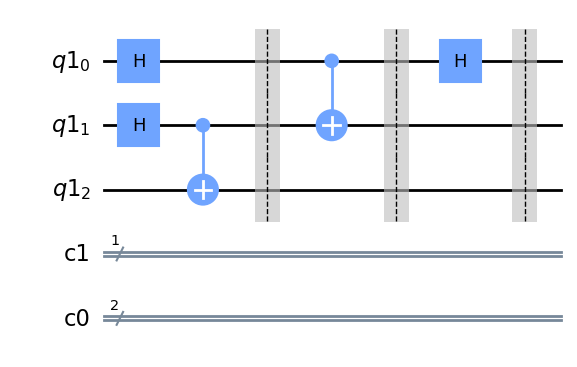

In [5]:
qc.h(0)
qc.barrier()
qc.draw("mpl")

<h2> Step 5 </h2>

<ul>
    <li> Measure the qubit 0 and store the result in classical register 0 </li>
    <li> Measure the qubit 1 and store the result in classical register 1 </li>
    <li> Add barrier for better visualization </li>
    <li> Draw the circuit </li>
</ul>

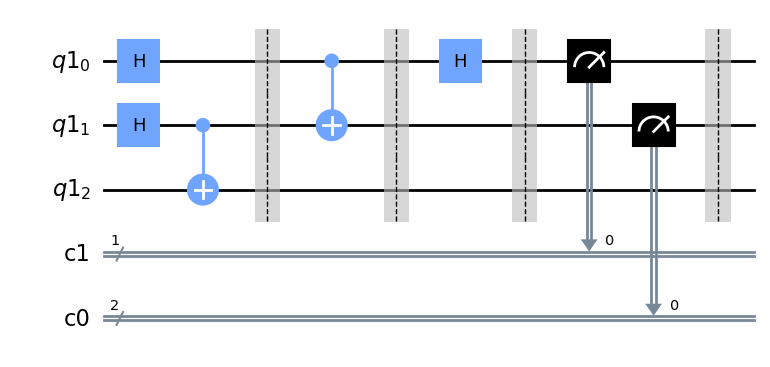

In [6]:
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw("mpl")

<h2> Step 6 </h2>

<ul>
    <li> Apply X gate to qubit 2 which is bob's qubit if classical register x is set </li>
    <li> Apply Z gate to qubit 2 if classical register z is set </li>
</ul>

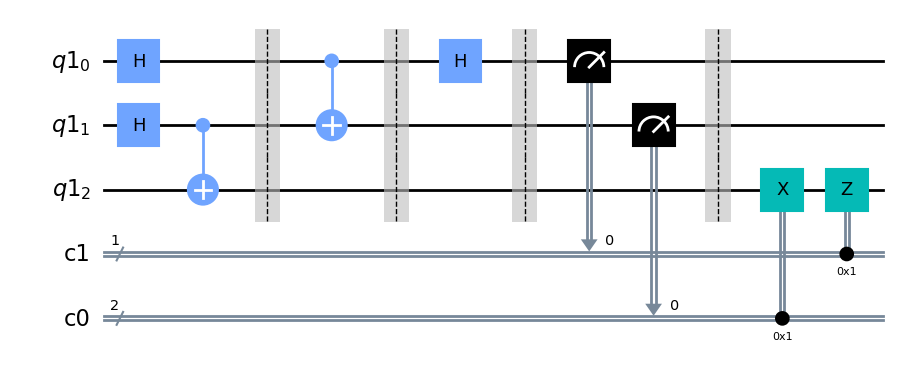

In [7]:
qc.x(2).c_if(crx,1)
qc.z(2).c_if(crz,1)
qc.draw("mpl")

<h2> Step 6 </h2>

<p> Execute the circuit on quantum simulator and get the state vector </p>

In [8]:
job = execute(qc,sim)
results = job.result()
full_statevector = results.get_statevector()
print(full_statevector)
partial_density_matrix = partial_trace(full_statevector,[0,1])
partial_statevector = np.diagonal(partial_density_matrix)
print(partial_statevector)

Statevector([ 0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.70710678+0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j,  0.70710678-8.65956056e-17j],
            dims=(2, 2, 2))
[0.5+0.j 0.5+0.j]


<h2> Step 7 </h2>

<p> Visualize result in bloch sphere

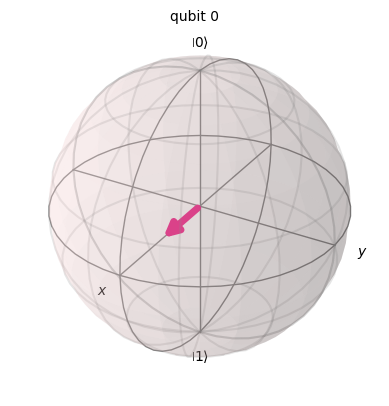

In [9]:
plot_bloch_multivector(partial_statevector)

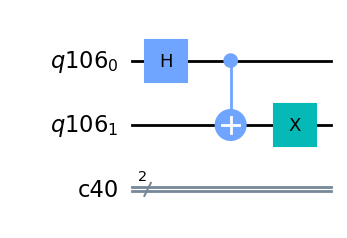